### Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from scipy.stats import norm
import scipy.optimize as opt
import scipy.stats as sts
import pandas as pd

In [2]:
file = "data/incomes.txt"
incomes = np.loadtxt(file)

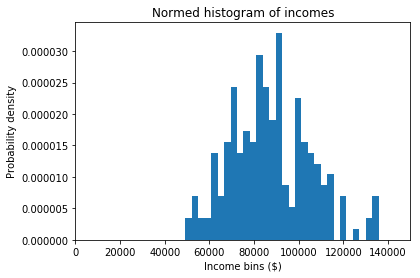

In [3]:
#Solution 1.a.
num_bins = 30
plt.hist(incomes, bins=num_bins, density=True)
plt.xlabel("Income bins ($)")
plt.ylabel("Probability density")
plt.title("Normed histogram of incomes")
plt.xlim([0, 150000])
plt.show()

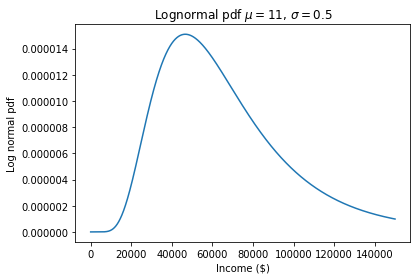

Log likelihood value = -2385.856997808558


In [4]:
#Solution 1.b.
mu, sigma = 11.0, 0.5
lb, ub = 0, 150000
N = 50000

x_vals = np.linspace(lb, ub, N)
ln_pdf = lognorm.pdf(x_vals, s=sigma, scale=np.exp(mu))
plt.plot(x_vals, ln_pdf)
plt.xlabel("Income ($)")
plt.ylabel("Log normal pdf")
plt.title("Lognormal pdf $\mu = 11$, $\sigma = 0.5$")
plt.show()

incomes_pdf_vals = lognorm.pdf(incomes, s=sigma, scale=np.exp(mu))
ln_pdf_vals = np.log(incomes_pdf_vals)
log_lik_val = ln_pdf_vals.sum()
print("Log likelihood value =", log_lik_val)

In [5]:
#Solution 1.c.
def crit(params, *args):
    '''
    params = [mu, sigma]
    args   = xvals
    '''
    mu, sigma = params
    incomes = args

    incomes_pdf_vals = lognorm.pdf(incomes, s=abs(sigma), scale=np.exp(mu))
    ln_pdf_vals = np.log(incomes_pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return -1 * log_lik_val

mu_init = 11
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
mle_args = incomes
results_uncstr = opt.minimize(crit, params_init, args=mle_args)
mu_MLE, sig_MLE = results_uncstr.x
print("MLE results:")
print(results_uncstr)

MLE results:
      fun: 2241.7193013573587
 hess_inv: array([[ 2.20429404e-04, -9.56905596e-07],
       [-9.56905596e-07,  1.08962777e-04]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 52
      nit: 8
     njev: 13
   status: 0
  success: True
        x: array([11.359023  ,  0.20817732])


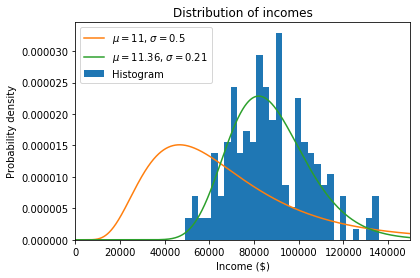

MLE estimates for mu = 11.36, sigma = 0.21
Value of log likelihood function = -2241.72
variance-covariance matrix:
[[ 2.20429404e-04 -9.56905596e-07]
 [-9.56905596e-07  1.08962777e-04]]


In [6]:
#histogram plot
num_bins = 30
plt.hist(incomes, bins=num_bins, density=True, label="Histogram")

#plot test distribution
x_vals = np.linspace(lb, ub, N)
ln_pdf = lognorm.pdf(x_vals, s=sigma, scale=np.exp(mu))
plt.plot(x_vals, ln_pdf, label="$\mu = 11$, $\sigma = 0.5$")

#plot MLE estimated distribution
ln_pdf = lognorm.pdf(x_vals, s=sig_MLE, scale=np.exp(mu_MLE))
plt.plot(x_vals, ln_pdf, label="$\mu = {:.2f}$, $\sigma = {:.2f}$".format(mu_MLE, sig_MLE))

plt.xlabel("Income ($)")
plt.ylabel("Probability density")
plt.title("Distribution of incomes")
plt.legend(loc='upper left')
plt.xlim([0, 150000])
plt.show()

print('MLE estimates for mu = {:.2f}, sigma = {:.2f}'.format(mu_MLE, sig_MLE))
print('Value of log likelihood function = {:.2f}'.format(-1 * results_uncstr['fun']))
print('variance-covariance matrix:')
print(results_uncstr['hess_inv'])

In [7]:
#Solution 1.d.
pdf_vals_h0 = lognorm.pdf(incomes, s=sigma, scale=np.exp(mu))
ln_pdf_vals_h0 = np.log(pdf_vals_h0)
log_lik_val_h0 = ln_pdf_vals_h0.sum()
print('hypothesis value log likelihood', log_lik_val_h0)

log_lik_val_mle = -1 * results_uncstr['fun']
print('MLE log likelihood', log_lik_val_mle)

LR_val = 2 * (log_lik_val_mle - log_lik_val_h0)
print('likelihood ratio value', LR_val)

pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

hypothesis value log likelihood -2385.856997808558
MLE log likelihood -2241.7193013573587
likelihood ratio value 288.2753929023984
chi squared of H0 with 2 degrees of freedom p-value =  0.0


Thus there is 0% chance that the actual data came from the hypothesized model in part (b).

In [8]:
#Solution 1.e.
cdf1 = 1 - lognorm.cdf(100000, s=sig_MLE, scale=np.exp(mu_MLE))
cdf2 = lognorm.cdf(75000, s=sig_MLE, scale=np.exp(mu_MLE))
print("Probability of earning more than $100,000 = ", cdf1)
print("Probability of earning less than $75,000 = ", cdf2)

Probability of earning more than $100,000 =  0.22986683028905697
Probability of earning less than $75,000 =  0.2602342676581424


### Problem 2

In [9]:
file = "data/sick.txt"
data = pd.read_csv(file)
print(data.head())
print(data.shape)

   sick    age  children  avgtemp_winter
0  1.67  57.47      3.04           54.10
1  0.71  26.77      1.20           36.54
2  1.39  41.85      2.31           32.38
3  1.37  51.27      2.46           52.94
4  1.45  44.22      2.72           45.90
(200, 4)


In [10]:
#Solution 2.a.
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
def crit2(params, *args):
    '''
    params = [b_0, b_1, b_2, b_3, sigma]
    args   = data (pandas df)
    '''
    b_0, b_1, b_2, b_3, sigma = params
    data, names = args
    eps_vals = data[names[0]] - b_0 - b_1 * data[names[1]] - b_2 * data[names[2]] - b_3 * data[names[3]]
    pdf_vals = norm(0, abs(sigma)).pdf(eps_vals)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return -1 * log_lik_val

params_init = np.array([1, 0, 0, 0, (0.01 ** 0.5)])
mle_args = data
names = ['sick', 'age', 'children', 'avgtemp_winter']
results = opt.minimize(crit2, params_init, args=(mle_args, names))
b_0_MLE, b_1_MLE, b_2_MLE, b_3_MLE, sigma_MLE = results.x

In [11]:
print('MLE estimates for b_0 = {:.3f}, b_1 = {:.3f}, b_2 = {:.3f}, b_3 = {:.3f}, variance = {:.6f}'\
     .format(b_0_MLE, b_1_MLE, b_2_MLE, b_3_MLE, sigma_MLE ** 2))
print('MLE log likelihood', -1 * results['fun'])
print('variance-covariance matrix:')
print(results['hess_inv'])

MLE estimates for b_0 = 0.252, b_1 = 0.013, b_2 = 0.401, b_3 = -0.010, variance = 0.000009
MLE log likelihood 876.8650462887064
variance-covariance matrix:
[[ 3.48731545e-05 -3.37666471e-07  3.42612576e-06 -9.16933365e-07
   5.63972577e-07]
 [-3.37666471e-07  3.66505864e-09 -3.27371242e-08  8.46900231e-09
  -5.29996261e-09]
 [ 3.42612576e-06 -3.27371242e-08  3.38237458e-07 -9.09210700e-08
   5.59998870e-08]
 [-9.16933365e-07  8.46900231e-09 -9.09210700e-08  2.46610976e-08
  -1.51333585e-08]
 [ 5.63972577e-07 -5.29996261e-09  5.59998870e-08 -1.51333585e-08
   3.15527720e-08]]


In [12]:
#Solution 2.b.
b_0, b_1, b_2, b_3, sigma = [1, 0, 0, 0, (0.01 ** 0.5)]
eps_vals = data[names[0]] - b_0 - b_1 * data[names[1]] - b_2 * data[names[2]] - b_3 * data[names[3]]
pdf_vals_h0 = norm(0, sigma).pdf(eps_vals)
ln_pdf_vals_h0 = np.log(pdf_vals_h0)
log_lik_val_h0 = ln_pdf_vals_h0.sum()
print('hypothesis value log likelihood', log_lik_val_h0)

log_lik_val_mle = -1 * results['fun']
print('MLE log likelihood', log_lik_val_mle)

LR_val = 2 * (log_lik_val_mle - log_lik_val_h0)
print('likelihood ratio value', LR_val)

pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 5)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

hypothesis value log likelihood -2253.700688042125
MLE log likelihood 876.8650462887064
likelihood ratio value 6261.131468661662
chi squared of H0 with 2 degrees of freedom p-value =  0.0


Thus there is 0% chance that the hypothesized model resembles the actual model. Thus there is 0% chance that the explanatory variables have no effect on the outcome variable.